# Pymaceuticals Inc.
---

### Analysis

The study compares the efficacy of several pharmaceuticals on tumor growth in mice. Key visual and statistical results are as follows:

- The drug regimens Capomulin and Ramicane report the lowest mean and median tumor volumes, along with the least variability, suggesting high effectiveness. Conversely, Ketapril and Naftisol indicate higher mean and median tumor volumes, implying lower efficacy.

- A line plot for a single mouse treated with Capomulin shows a decrease in tumor volume over time, demonstrating the treatment's efficacy for this individual case.

- A pie chart illustrates a nearly balanced distribution between female and male mice, allowing for gender-related biological factors to be evenly considered.

- There is a strong positive correlation (0.84) between mouse weight and average tumor volume, indicating that heavier mice tend to have larger tumor volumes. This suggests that physiological factors significantly influence treatment outcomes.

- Regression analysis reveals that 70% of the model fits the data, which is fairly good for predicting data from the model. An R-squared value of 0.70 indicates a relatively high level of explanation of the variance around the mean.

- Among the treatments examined, Capomulin and Ramicane appear more effective in reducing tumor sizes.

Additional observations from the data include:

- The bar graph shows the Capomulin regimen has the highest number of mice at 230, while Zoniferol has the fewest at 182.

- After removing duplicate entries, the total number of unique mice in the study is 248, with a near-even gender split (124 female, 125 male).

Overall, the analysis suggests that Capomulin and Ramicane are more effective in treating tumors in mice compared to other regimens in the study. The strong correlation between mouse weight and tumor volume, along with the substantial explanatory power of the regression model, underscores the importance of considering physiological factors in treatment outcomes. The detection of outliers, particularly in the Infubinol group, indicates variability in response to treatment, necessitating individual examination. The gender distribution ensures the results can be generalized across sexes, and the data provides a solid foundation for predicting tumor volume changes based on mouse weight.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df=pd.merge(study_results, mouse_metadata,how='outer',on="Mouse ID")

# Display the data table for preview
df.head(5)

C:\Users\darvarir\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_mice=df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = df.loc[df.duplicated(['Mouse ID', 'Timepoint']),"Mouse ID"].unique()

duplicate_mouse_ids


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data=df.loc[df["Mouse ID"]=="g989",:]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=df[df["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice=clean_df["Mouse ID"].nunique()
clean_num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_clean_df=clean_df.groupby('Drug Regimen')

mean=grouped_clean_df['Tumor Volume (mm3)'].mean()
median=grouped_clean_df['Tumor Volume (mm3)'].median()
variance=grouped_clean_df['Tumor Volume (mm3)'].var()
std_dev = grouped_clean_df['Tumor Volume (mm3)'].std()
sem = grouped_clean_df['Tumor Volume (mm3)'].sem()

summary_stats_df=pd.DataFrame({'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume SEM': sem})

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

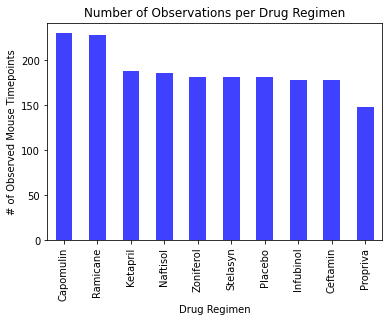

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = clean_df['Drug Regimen'].value_counts()
drug_regimen_count.plot(kind='bar', color='b',alpha=0.75)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Observations per Drug Regimen")
plt.xticks(rotation='vertical')
plt.show()

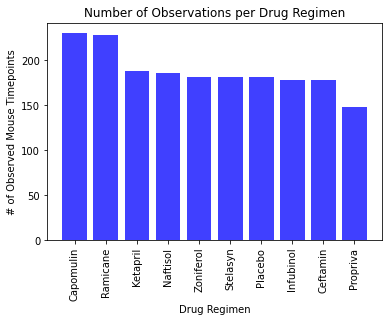

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens = drug_regimen_count.index
counts = drug_regimen_count.values
plt.bar(regimens, counts, color='b', alpha=0.75)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Observations per Drug Regimen")
plt.xticks(rotation='vertical')
plt.show()

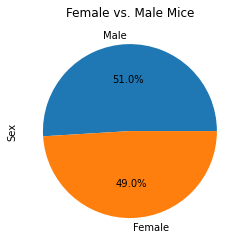

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data=clean_df["Sex"].value_counts()
gender_data.plot(kind='pie',autopct="%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

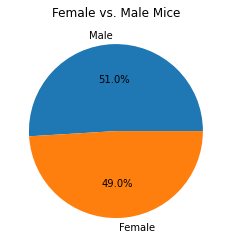

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=gender_data.index
plt.pie(gender_data, labels=labels,autopct='%1.1f%%')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df=clean_df[clean_df['Drug Regimen'].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume=pd.merge(last_timepoint,clean_df,on=['Mouse ID','Timepoint'], how='left')
sorted_final_tumor_volume = final_tumor_volume.sort_values(by='Drug Regimen')
sorted_final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
49,l897,45,38.846876,1,Capomulin,Male,17,19
34,j119,45,38.125164,1,Capomulin,Female,7,23
35,j246,35,38.753265,1,Capomulin,Female,21,21
78,u364,45,31.023923,3,Capomulin,Male,18,17
26,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
37,j913,45,31.560470,1,Ramicane,Female,4,17
38,j989,45,36.134852,1,Ramicane,Male,8,19
40,k403,45,22.050126,1,Ramicane,Male,21,16
50,m546,45,30.564625,1,Ramicane,Male,18,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df=final_tumor_volume[final_tumor_volume['Drug Regimen']==treatment] 
    volumes=treatment_df['Tumor Volume (mm3)']
    # add subset 
    tumor_vol_data.append(volumes)
    
    
    quartiles=volumes.quantile([0.25, 0.5, 0.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


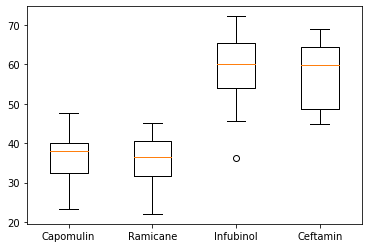

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data)
ticks=list(range(1,len(treatments)+1))
plt.xticks(ticks=ticks,labels=treatments)

plt.show()

## Line and Scatter Plots

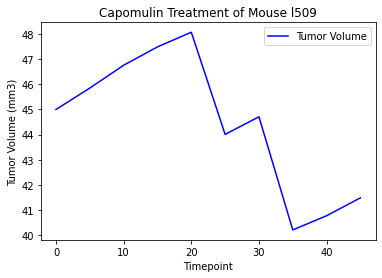

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df=clean_df[clean_df["Drug Regimen"]=='Capomulin']

mouse_id='l509'
mouse_data=capomulin_df[capomulin_df['Mouse ID']==mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b', label='Tumor Volume')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')
plt.legend()
plt.show()

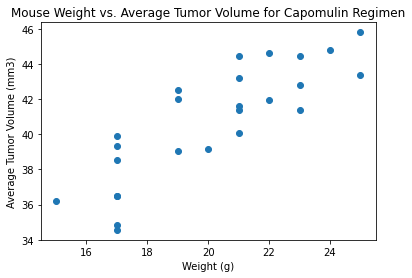

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data = pd.merge(average_tumor_volume, capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84
The r-squared is: 0.709


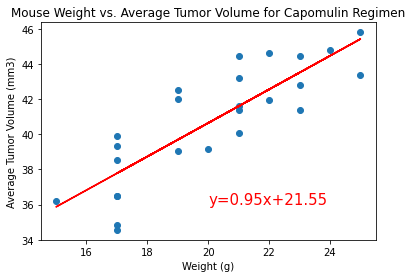

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation[0]:.2f}")

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"The r-squared is: {round(rvalue**2,3)}")

line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
regress_values=merged_data['Weight (g)']*slope+intercept

plt.scatter(merged_data['Weight (g)'],merged_data['Tumor Volume (mm3)'])
plt.plot(merged_data['Weight (g)'], regress_values, 'r-')
plt.annotate(line_eq, (20,36), fontsize=15, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()